In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from collections import Counter
import random

from scripts import utils
from scripts import documents as docs
from scripts import comparisons 
from scripts import comparisonsmachine as machine

data_folder = "data"
spotify_file = "spotify_articles.csv"
spotify_path = os.path.join(data_folder, spotify_file)

census_file = "census_articles.csv"
census_path = os.path.join(data_folder, census_file)

helsinki_file = "helsinki_articles.csv"
helsinki_path = os.path.join(data_folder, helsinki_file)

spotify_df = utils.readArticles(spotify_path)
census_df = utils.readArticles(census_path)
helsinki_df = utils.readArticles(helsinki_path)

ImportError: cannot import name 'utils' from 'scripts' (C:\Users\v-lindo\anaconda3\lib\site-packages\scripts\__init__.py)

In [4]:
helsinki_df.head()

NameError: name 'helsinki_df' is not defined

In [2]:
clust_levinson = [610, 3581, 6678]
clust_reuters = [761, 16223]
clust_ap = [8200, 8818, 9990]
clust_ap_files = [12769, 2313, 6190]
clust_freshair = [7042, 6644]
unique = [6754, 10053, 10250, 6146, 967, 15307, 15482, 604, 1766, 4738, 5906, 6844, 14721, 14730]
clust_wrong = [10254, 9090]
clust_snippet = [7624, 8985, 5289]
# 7624 = paraphrase of AP
# 8985 = briefing of many news stories, includes snippet from 6844
# 967 = not exactly copied from, but heavily based off of the original NYT report 
# 1766 = heavily based off of reuters 

In [4]:
dd = comparisons.DuplicationDetection()

doc_r1 = docs.Document(census_df.loc[census_df["id"] == 761, "text"].iloc[0])
doc_r2 = docs.Document(census_df.loc[census_df["id"] == 16223, "text"].iloc[0])
doc_ap1 = docs.Document(census_df.loc[census_df["id"] == 8200, "text"].iloc[0])
doc_ap2 = docs.Document(census_df.loc[census_df["id"] == 8818, "text"].iloc[0])
doc_w = docs.Document(census_df.loc[census_df["id"] == 10254, "text"].iloc[0])

doc_6844 = docs.Document(census_df.loc[census_df["id"] == 6844, "text"].iloc[0])
snip_8985 = docs.Document(census_df.loc[census_df["id"] == 8985, "text"].iloc[0])

Pairwise sentence jaccard indices between two unique vs. duplicate documents


Text(0.5, 1.0, 'Probability density histograms of pairwise sentence Jaccard indices')

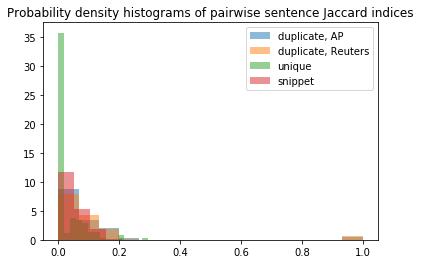

In [5]:
def hist(mat, density = True, alpha = 0.5, bins = 15):
    if len(np.shape(mat)) > 1:
        mat = utils.flatten(mat)
    plt.hist(mat, density = density, alpha = alpha, bins = bins)

print("Pairwise sentence jaccard indices between two unique vs. duplicate documents")

hist(dd.compute_jaccard_matrix(doc_ap1, doc_ap2))
hist(dd.compute_jaccard_matrix(doc_r1, doc_r2))
hist(dd.compute_jaccard_matrix(doc_r1, doc_w))
hist(dd.compute_jaccard_matrix(doc_6844, snip_8985))
plt.legend(["duplicate, AP", "duplicate, Reuters", "unique", "snippet"])
plt.title("Probability density histograms of pairwise sentence Jaccard indices")

C:\Users\v-lindo\anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


No sentences pairs from the unique article pair was selected


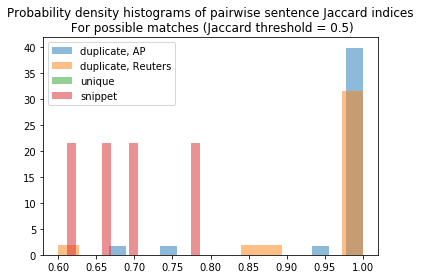

In [6]:
hist(dd.compute_jaccard_matrix(doc_ap1, doc_ap2)[np.where(dd.get_match_matrix() > 0)])
hist(dd.compute_jaccard_matrix(doc_r1, doc_r2)[np.where(dd.get_match_matrix() > 0)])
hist(dd.compute_jaccard_matrix(doc_r1, doc_w)[np.where(dd.get_match_matrix() > 0)])
hist(dd.compute_jaccard_matrix(doc_6844, snip_8985)[np.where(dd.get_match_matrix() > 0)])
plt.legend(["duplicate, AP", "duplicate, Reuters", "unique", "snippet"])
plt.title("Probability density histograms of pairwise sentence Jaccard indices\n For possible matches (Jaccard threshold = 0.5)")
print("No sentences pairs from the unique article pair was selected")

Since we see that many of the 'fuzzy' scores of 0.6-0.8 are from the snippet pair,
let's take a closer look at the example matches:

Article Similarity Score: 0.07667949334616002
(Weighted by Average Article Length: 0.048429153692311586 )

S 0 :  Immigration activists rallied outside the Supreme Court in April as the justices heard arguments over the Trump administration's plan to ask about citizenship on the 2020 census.(J. Scott Applewhite/Associated Press/File 2019) 

	T 65 0.7 :  Immigration activists rally outside the Supreme Court as the justices hear arguments over the Trump administration's plan to ask about citizenship on the 2020 census, in Washington. 

S 2 : Just weeks before the Supreme Court is expected to rule on whether the Trump administration can add a citizenship question to the 2020 census, new evidence emerged Thursday suggesting that the question was crafted specifically to give an electoral advantage to white Republicans. 

	T 68 0.79 : Just weeks before the Supr

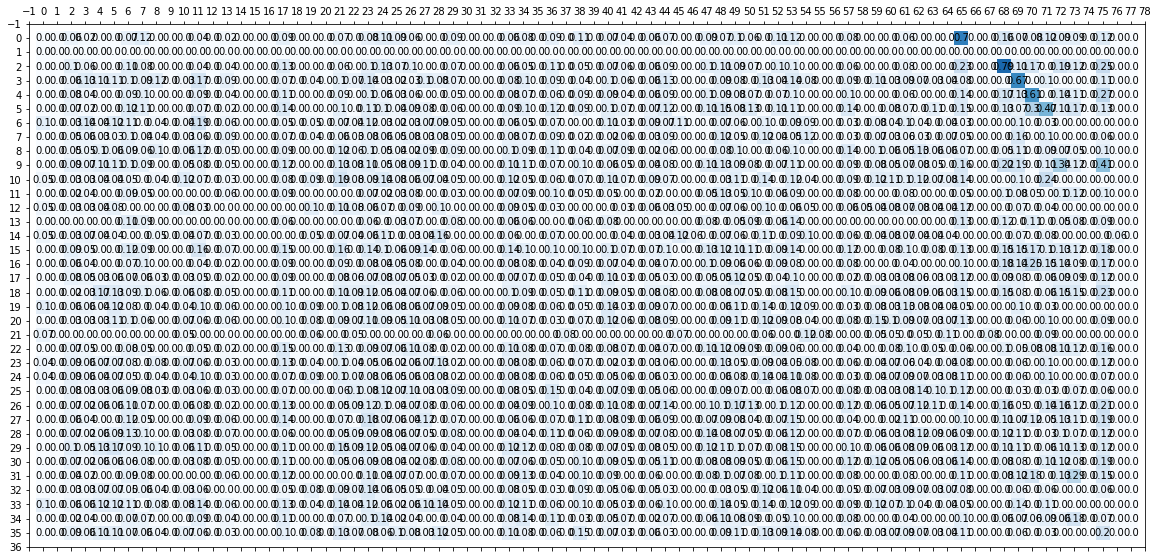

In [7]:
print("Since we see that many of the 'fuzzy' scores of 0.6-0.8 are from the snippet pair,\nlet's take a closer look at the example matches:")
jac_mat_snip = dd.compute_jaccard_matrix(doc_6844, snip_8985)
match_mat_snip = dd.get_match_matrix()
#ac.display_mat(match_mat_snip)

print("\nArticle Similarity Score:", dd.jaccard_score())
print("(Weighted by Average Article Length:", np.sum(jac_mat_snip * match_mat_snip)/np.mean(jac_mat_snip.shape), ")\n")
dd.print_sentence_matches()

utils.display_mat(jac_mat_snip)
utils.display_mat(am_mat_snip)

In [8]:
bow1 = doc_6844.get_bow_sentences()[3]
bow2 = snip_8985.get_bow_sentences()[69]
dd.jaccard_index(bow1, bow2, visualize = True), dd.jaccard_index(bow1, bow2, visualize = True, counts = True)

Jaccard Index: 0.6666666666666666 with counts False
I: {'in', 'thomas', 'republican', 'of', 'august', 'file', 'the', 'be', 'find', 'evidence', 'redistricting', 'prominent', 'strategist', 'hofeller'}
A-B: {'die', 'who', 'a'} 
B-A: {'new', 'death', 'after', 'his'}
Jaccard Index: 0.6153846153846154 with counts True
I: {'in', 'thomas', 'republican', 'of', 'august', 'file', 'the', 'be', 'find', 'evidence', 'redistricting', 'prominent', 'strategist', 'hofeller'}
A-B: {'die', 'who', 'a'} 
B-A: {'new', 'death', 'after', 'his'}


(0.6666666666666666, 0.6153846153846154)

In [9]:
bow1 = doc_6844.get_bow_sentences()[5]
bow2 = snip_8985.get_bow_sentences()[71]
dd.jaccard_index(bow1, bow2, visualize = True)

doc_6844.get_sentence(5), snip_8985.get_sentence(71)

Jaccard Index: 0.4666666666666667 with counts False
I: {'court', 'proceeding', 'in', 'obscure', 'that', 'purposely', 'official', 'administration', 'lawyer', 'role', 'the', 'trump', '’s', 'hofeller'}
A-B: {'jesse', 'judge', 'plaintiff', 'for', 'district', 'question', 'furman', 'write', 'us', 'to', 'a', 'and', 'letter', 'challenge'} 
B-A: {'also', 'argue'}


('‘‘ and that Trump administration officials purposely obscured Hofeller’s role in court proceedings, lawyers for plaintiffs challenging the question wrote in a letter to US District Judge Jesse Furman.',
 'The lawyers also argued that Trump administration officials purposely obscured Hofeller’s role in court proceedings.')

0 of 17 rows completed, 0.00m elapsed


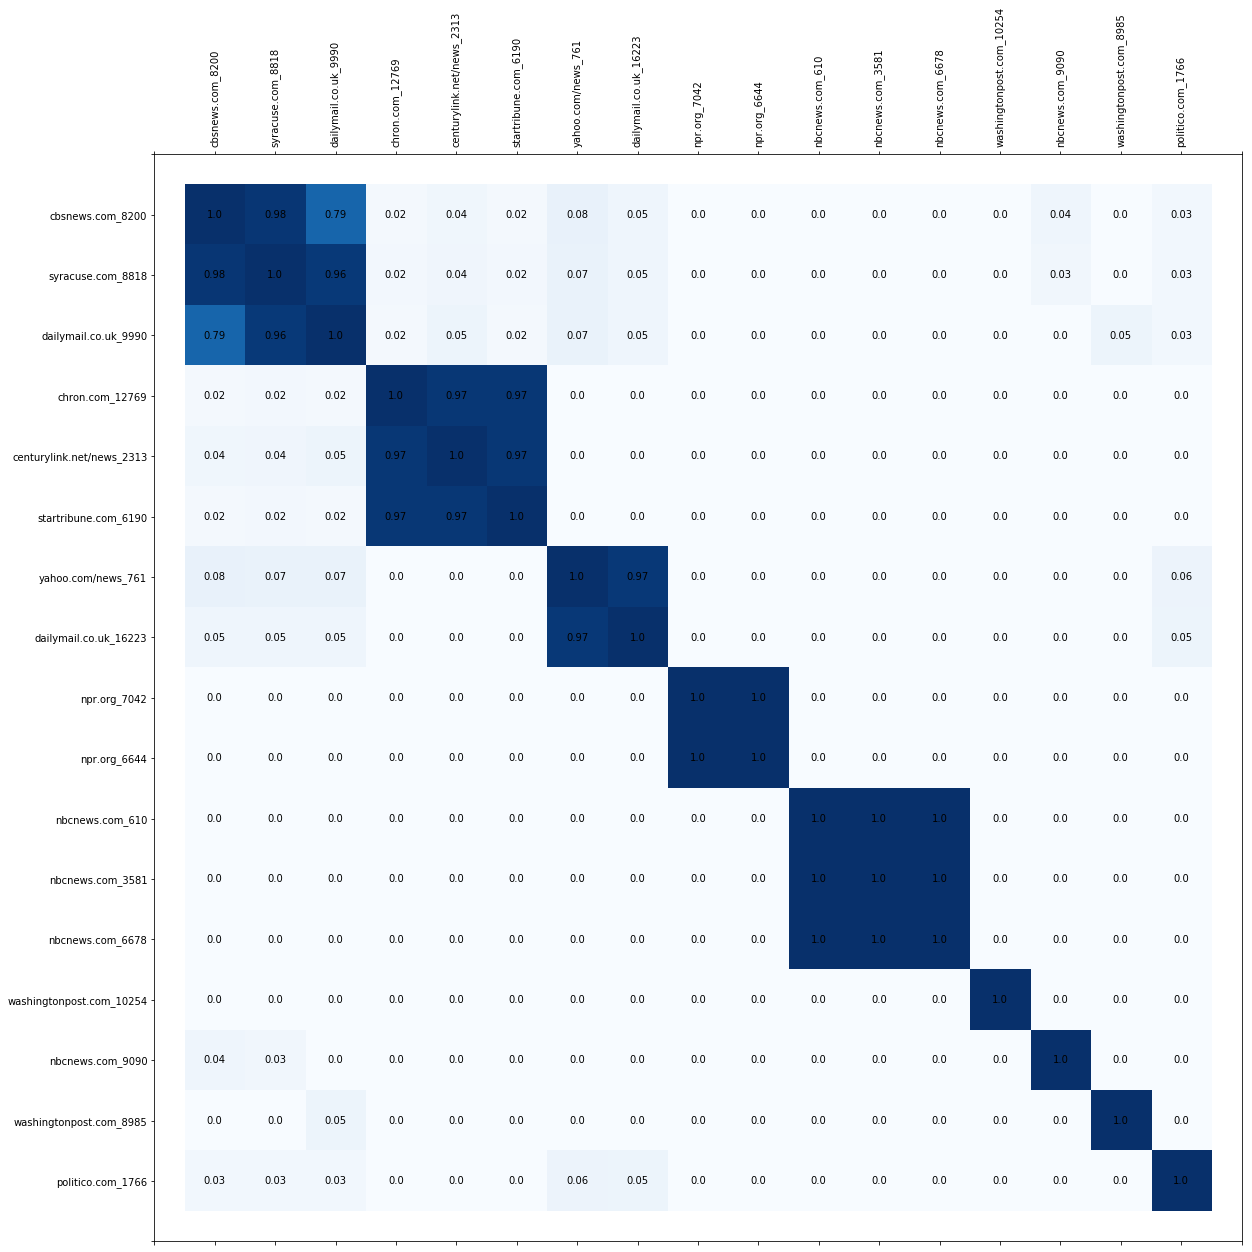

In [10]:
docs_list = clust_ap + clust_ap_files + clust_reuters + clust_freshair + clust_levinson + clust_wrong + [8985, 1766]
# 8985 = briefing of many news stories, includes snippet from 6844
# 1766 = heavily based off of reuters 
clusters_dict = dd.dict_by_ids(census_df, docs_list)

score_mat = dd.similarity_mat(clusters_dict, ordered = False)
axislabels = [census_df[census_df["id"] == id].iloc[0, 1] + "_" + str(id) for id in docs_list]
utils.display_mat(score_mat, xlabs = axislabels)

All articles were correctly grouped, though 8200 and 9990 have a relatively lower similarity score of 0.79

Article Similarity Score: 0.7938013915243517
(Weighted by Average Article Length: 0.7571644042232278 )

S 3 :  NEW YORK  

	T 0 0.67 :  NEW YORK (AP) - 

S 4 : A Republican redistricting expert advocated for adding a citizenship question to the 2020 census to give an electoral edge to white people and Republicans, opponents of the move alleged in a court filing Thursday. 

	T 1 1.0 : A Republican redistricting expert advocated for adding a citizenship question to the 2020 census to give an electoral edge to white people and Republicans, opponents of the move alleged in a court filing Thursday. 

S 5 :  The filing in Manhattan federal court said a trove of newly discovered documents revealed that Thomas Hofeller, a longtime Republican gerrymandering guru, played a key role in pushing the Trump administration to include a citizenship question on the census for the first time since 

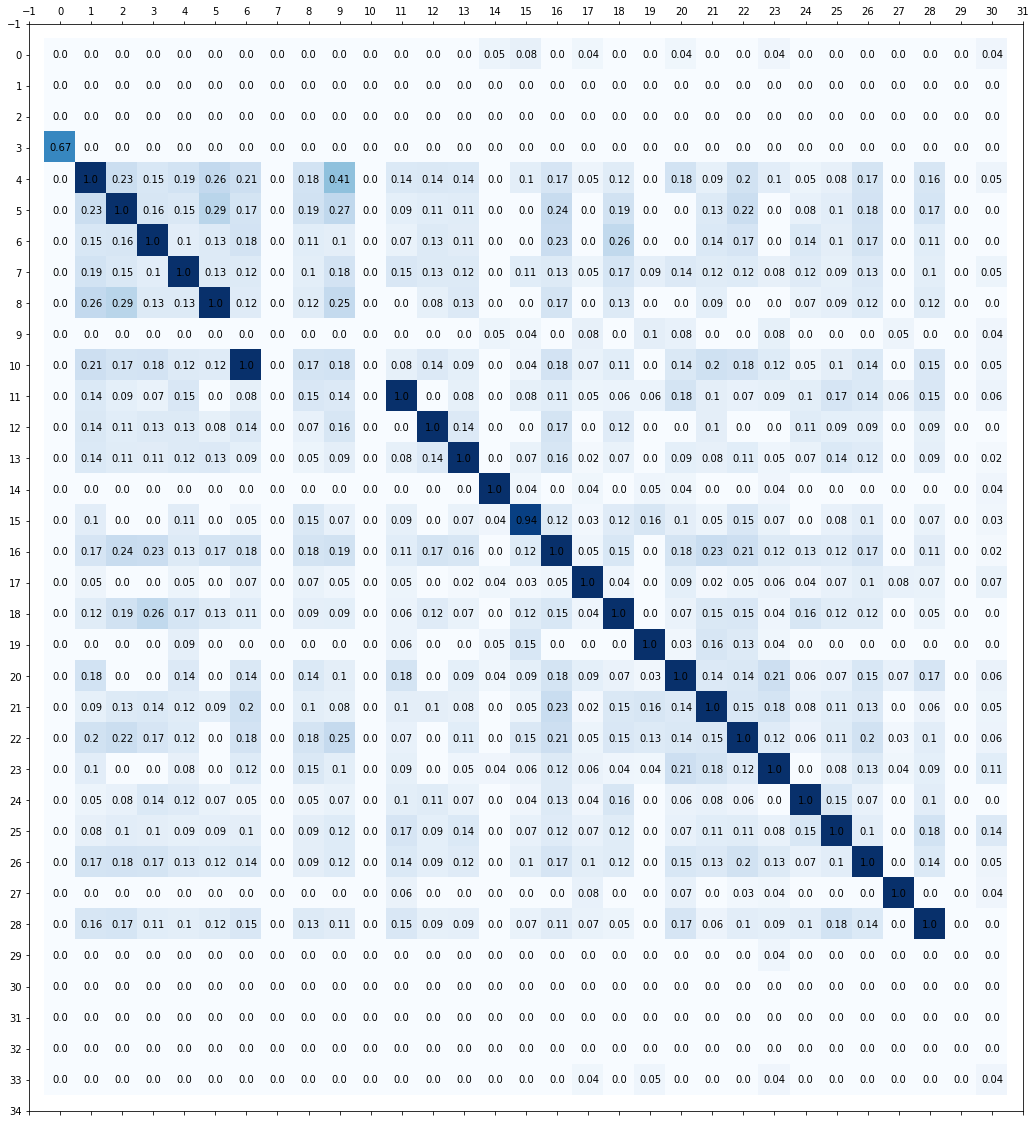

In [11]:
print("All articles were correctly grouped, though 8200 and 9990 have a relatively lower similarity score of 0.79")

jac_mat = dd.compute_jaccard_matrix(clusters_dict[8200], clusters_dict[9990])
match_mat = dd.get_match_matrix()

print("\nArticle Similarity Score:", dd.jaccard_score())
print("(Weighted by Average Article Length:", np.sum(jac_mat * match_mat)/np.mean(jac_mat.shape), ")\n")
dd.print_sentence_matches()

utils.display_mat(jac_mat)

In [12]:
print("It appears that the first and last few sentences of 8200 are filler content:\n")
print(clusters_dict[8200].get_sentences()[:5])
print(clusters_dict[8200].get_sentences()[-5:])

It appears that the first and last few sentences of 8200 are filler content:

['Lawyer claims documents reveal census question added to help Republicans'
 ' May 31, 2019 / 10:50 AM' ' Debate over 2020 census question'
 ' NEW YORK\xa0' '—']
[' First published on May 31, 2019 / 10:50 AM' ' © 2019'
 'The Associated Press.' 'All Rights Reserved.'
 'This material may not be published, broadcast, rewritten, or redistributed.']


0 of 24 rows completed, 0.00m elapsed


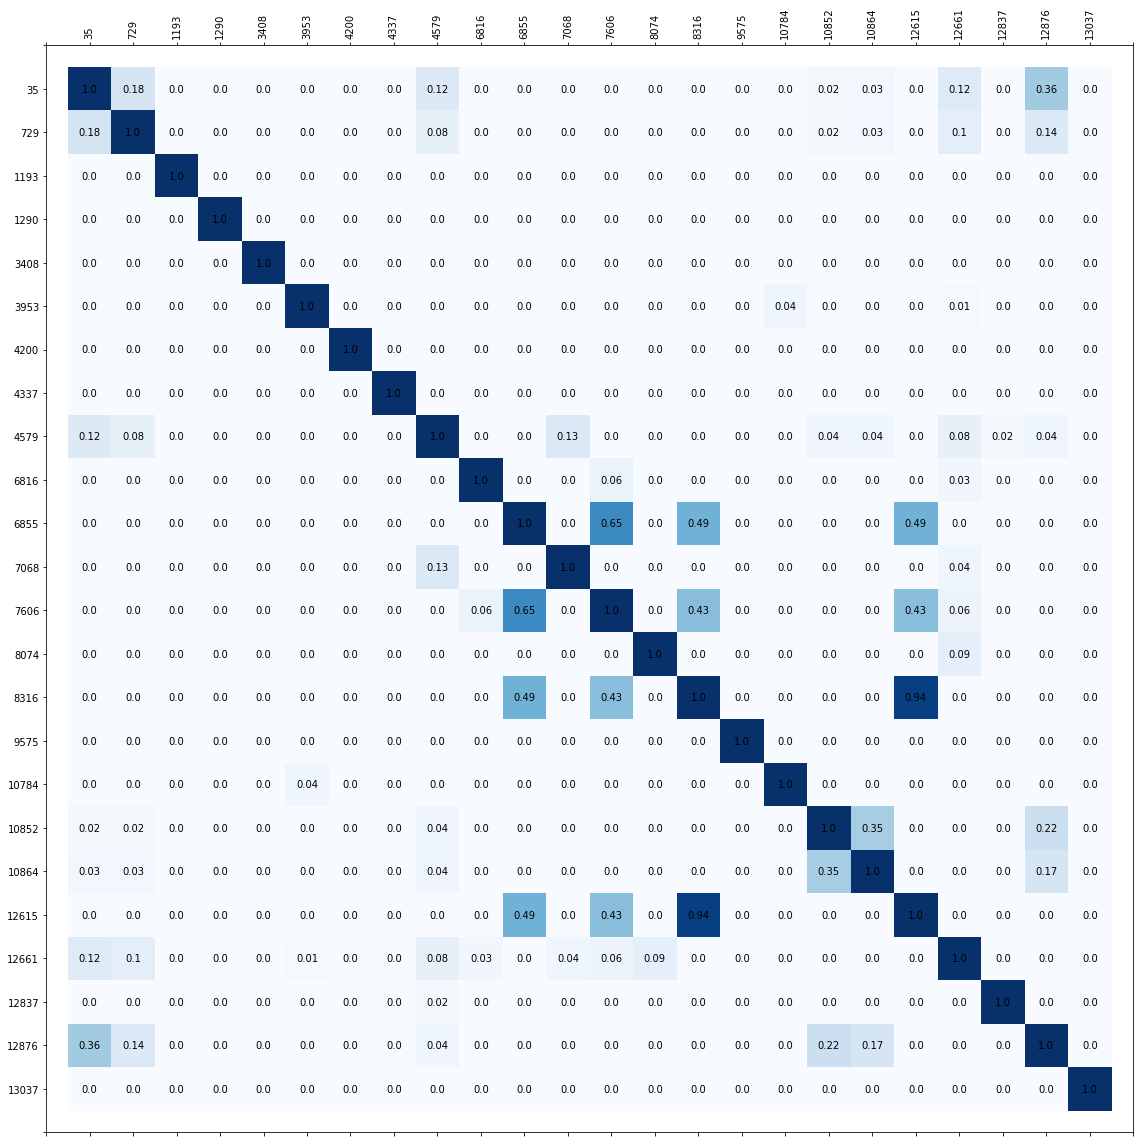

In [13]:
dm_ids = helsinki_df.loc[(helsinki_df["publisher"] == "dailymail.co.uk"), "id"]
dm_dict = dd.dict_by_ids(helsinki_df, dm_ids)

score_mat_dm = dd.similarity_mat(dm_dict)
axislabels = list(dm_dict.keys())
utils.display_mat(score_mat_dm, True, axislabels)

# 35, 729, and 12876 contain similar snippets as they are all news-in-summary type articles
# 6855, 7606 have a score of .61; are both very short articles sharing similar sentences 
# 6855, 8316[12615] have score .25[.29]; contains many short sentences (captions?) that are in 6855
# 8316, 12615 .86,  same article 
# 10864, 10852 have score .25, same topic, different articles but some shared sentences (esp. photo captions)

Example of a 0.34 pairwise article similarity

S 0 : Sunday, Jul 15th 2018 5-Day Forecast 

	T 0 1.0 : Sunday, Jul 15th 2018 5-Day Forecast 

S 2 :  PHILADELPHIA (AP) - 

	T 2 1.0 :  PHILADELPHIA (AP) - 

S 3 : The U.S. homeland security secretary said on Saturday there are no signs that Russia is targeting this year's midterm elections with the same "scale or scope 

	T 4 0.52 :  The U.S. homeland security secretary says there are no signs Russia is targeting the 2018 midterm elections for cyberattacks with the "scale and scope" it used in 2016. 

S 6 : But coming amid fresh allegations into Russia's attempts to sway the 2016 election, the sessions on election security have a higher level of urgency and interest. 

	T 31 1.0 : But coming amid fresh allegations into Russia's attempts to sway the 2016 election, the sessions on election security have a higher level of urgency and interest. 

S 9 :  U.S. Department of Homeland Security Secretary Kirstjen Nielsen addresses a convention of 

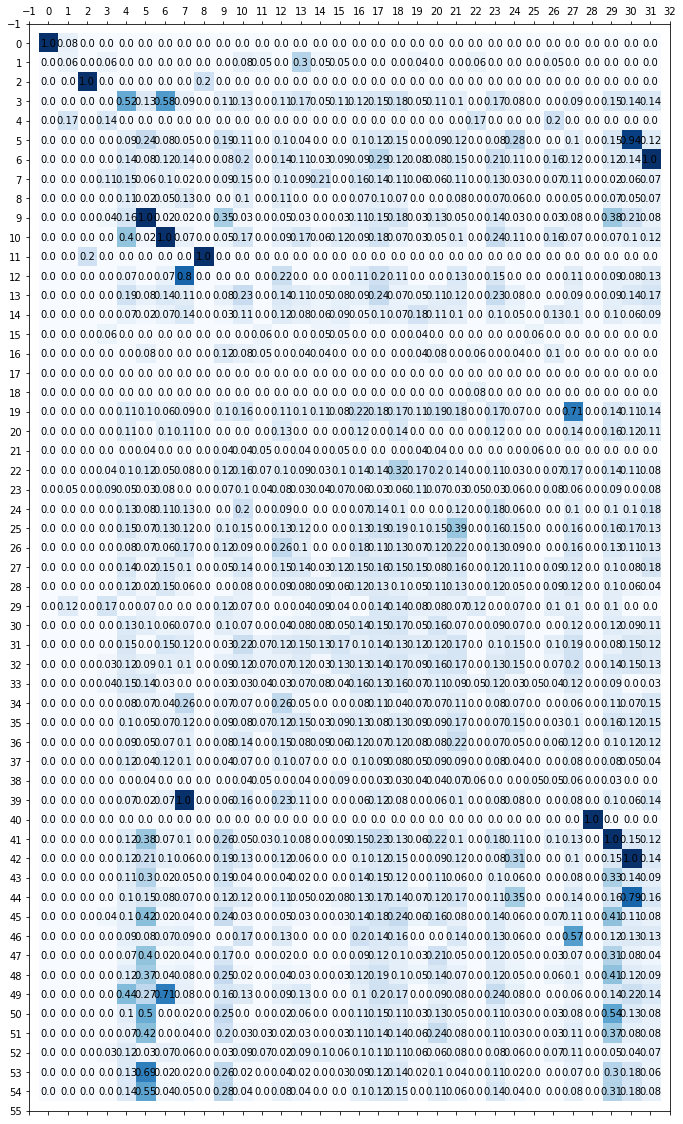

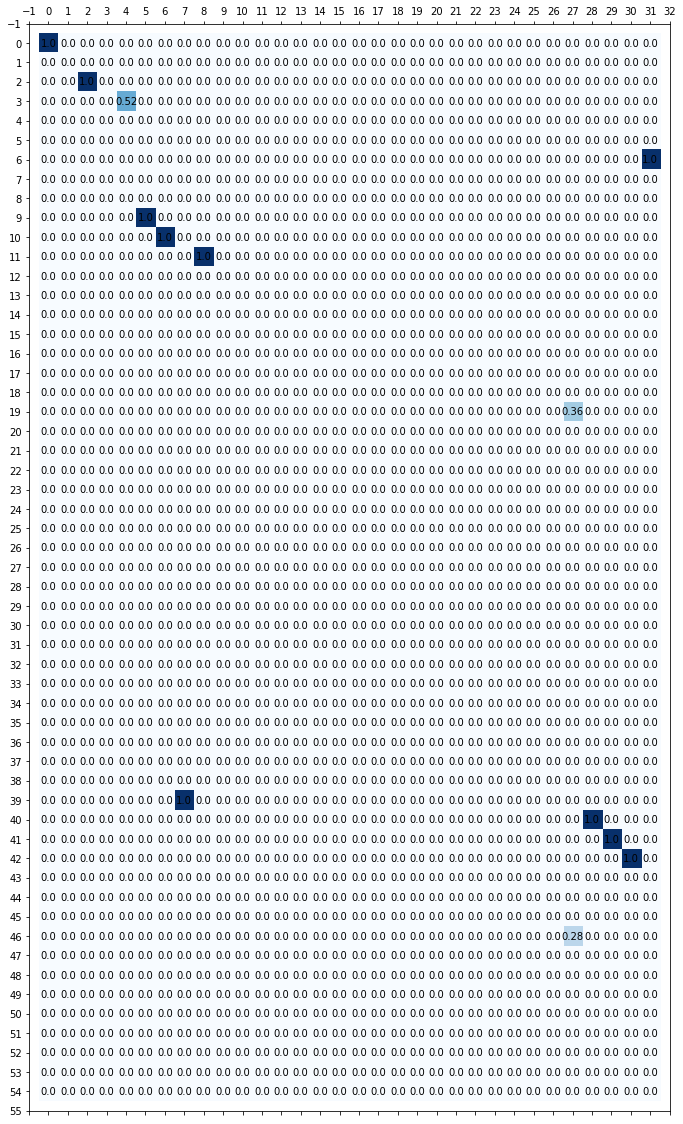

In [14]:
id1 = 10852
id2 = 10864
print("Example of a 0.34 pairwise article similarity\n")
jac_mat = dd.compute_jaccard_matrix(dm_dict[id1], dm_dict[id2])
match_mat = dd.get_match_matrix()
dd.print_sentence_matches()
dd.jaccard_score()

utils.display_mat(jac_mat)
utils.display_mat(jac_mat * match_mat)

In [15]:
definite_matches = [(i, j) for (i, j) in zip(range(jac_mat.shape[0]), np.argmax(jac_mat, axis = 1)) if jac_mat[i, j] > 0.9]
for (i, j) in definite_matches:
    print(i, j)

0 0
2 2
5 30
6 31
9 5
10 6
11 8
39 7
40 28
41 29
42 30


In [16]:
"""
for (i, doc) in dm_dict.items():
    print(i, "\n")
    print(doc, "\n\n")
"""

'\nfor (i, doc) in dm_dict.items():\n    print(i, "\n")\n    print(doc, "\n\n")\n'

0 of 25 rows completed, 0.00m elapsed


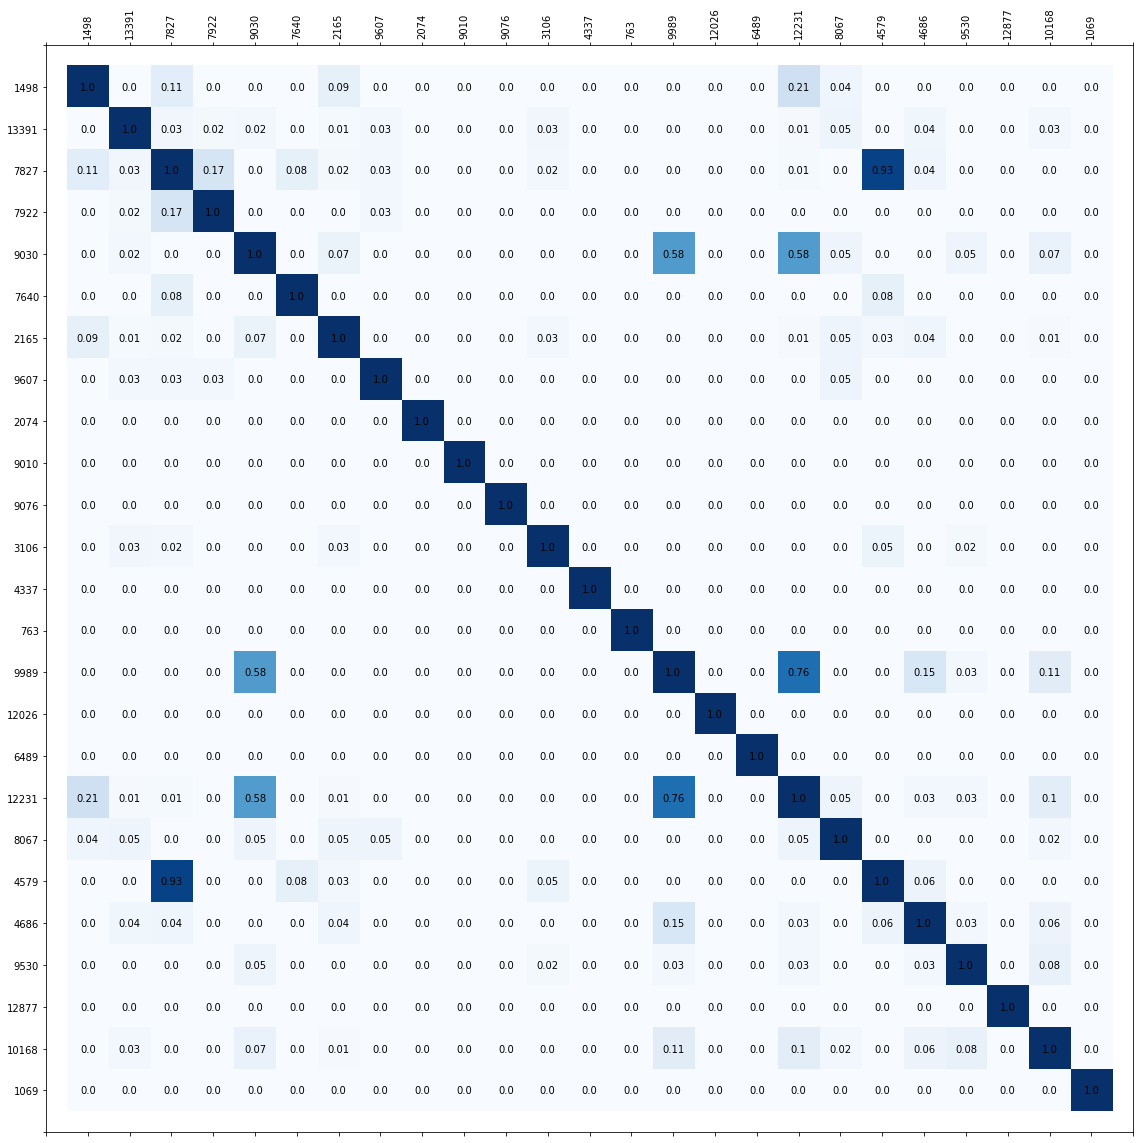

In [17]:
#rand_ids = random.sample(list(helsinki_df["id"]), 25)
rand_ids = [1498, 13391, 7827, 7922, 9030, 7640, 2165, 9607, 
            2074, 9010, 9076, 3106, 4337, 763, 9989, 12026, 6489, 
            12231, 8067, 4579, 4686, 9530, 12877, 10168, 1069]
helsinki_dict = dd.dict_by_ids(helsinki_df, rand_ids)

score_mat_helsinki = dd.similarity_mat(helsinki_dict, ordered = False)
axislabels = list(helsinki_dict.keys())
utils.display_mat(score_mat_helsinki, True, axislabels)

# articles 7827, 4579 are the same article with the exception of an additional few paras
# articles 9030, 9989, 12231 all share copied paragraphs, but also different follow-up paragraphs 

Example of a 0.79 pairwise article similarity

S 9 : President Donald Trump and Vladimir Putin opened their summit Monday with serious expression all around and the American president declaring that "the world wants to see us get along. 

	T 3 1.0 :  President Donald Trump and Vladimir Putin opened their summit Monday with serious expression all around and the American president declaring that "the world wants to see us get along. 

S 10 :  Trump laid out a list of topics for discussion that notably did not include Russian meddling in the 2016 presidential election. 

	T 4 1.0 : Trump laid out a list of topics for discussion that notably did not include Russian meddling in the 2016 presidential election. 

S 11 : We have not been getting along well for the last number of years," Trump said as he and Putin sat down at the Presidential Palace in Finland's capital. 

	T 5 1.0 : We have not been getting along well for the last number of years," Trump said as he and Putin sat down at the Pr

0.76

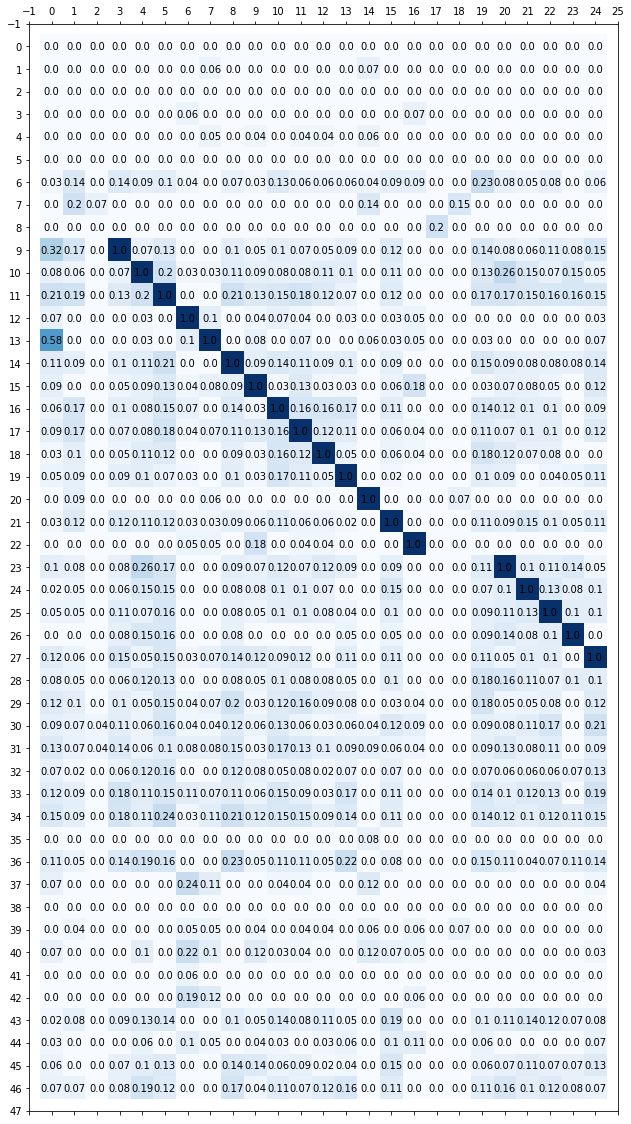

In [18]:
id1 = 12231
id2 = 9989
print("Example of a 0.76 pairwise article similarity\n")
dd.compute_jaccard_matrix(helsinki_dict[id1], helsinki_dict[id2])
utils.display_mat(dd.get_jaccard_matrix())
dd.print_sentence_matches()
dd.jaccard_score()

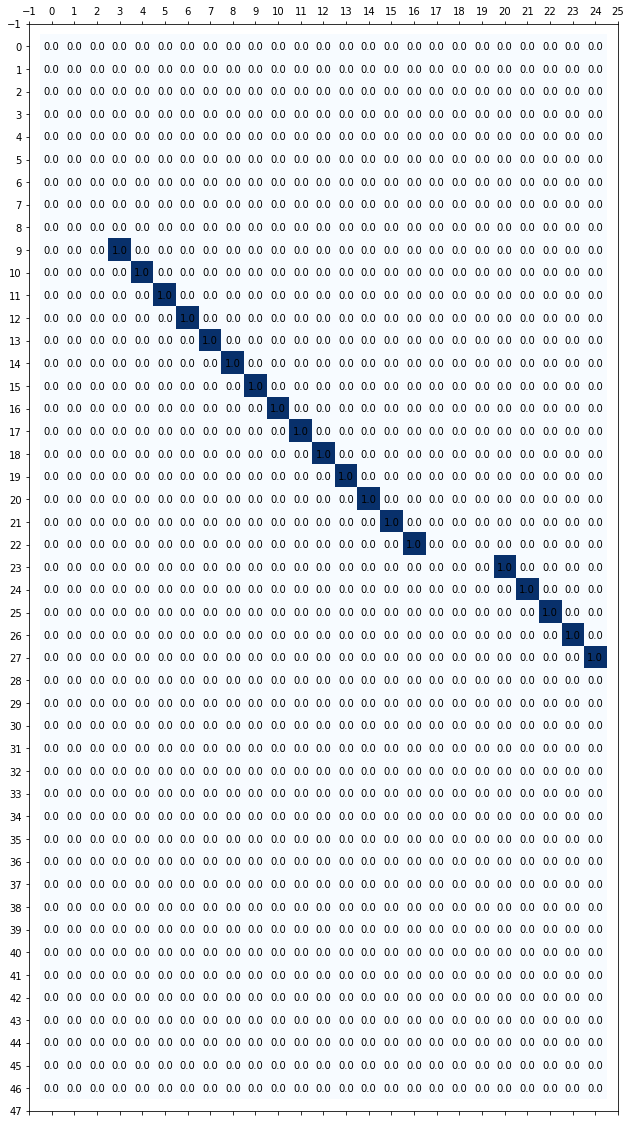

In [19]:
utils.display_mat(dd.get_match_matrix())

Text(0.5, 1.0, 'Probability density histogram of pairwise article similarity scores\n for non-zero similarities')

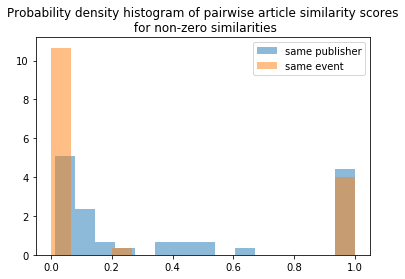

In [20]:
hist(score_mat_dm[np.where(score_mat_dm > 0)])
hist(score_mat_helsinki[np.where(score_mat_dm > 0)])
plt.legend(["same publisher", "same event"])
plt.title("Probability density histogram of pairwise article similarity scores\n for non-zero similarities")

Percentage Unique articles (similarity < 0.25): 0.79
Percentage Unique articles (similarity < 0.75): 0.96


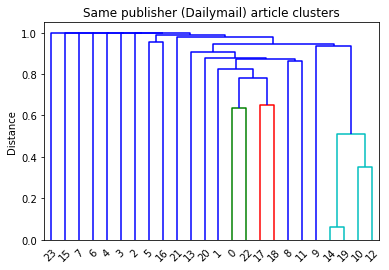

In [21]:
clusts = dd.cluster_articles(score_mat_dm, plot = True)
plt.title("Same publisher (Dailymail) article clusters")

print("Percentage Unique articles (similarity < %.2f): %.2f" % (0.25, dd.prop_unique_clusters(0.25)))
print("Percentage Unique articles (similarity < %.2f): %.2f" % (0.75, dd.prop_unique_clusters(0.75)))


Percentage Unique articles (similarity < 0.25): 0.88
Percentage Unique articles (similarity < 0.75): 0.92


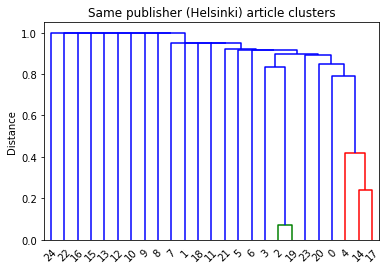

In [22]:
clusts = dd.cluster_articles(score_mat_helsinki, plot = True)
plt.title("Same publisher (Helsinki) article clusters")

print("Percentage Unique articles (similarity < %.2f): %.2f" % (0.25, dd.prop_unique_clusters(0.25)))
print("Percentage Unique articles (similarity < %.2f): %.2f" % (0.75, dd.prop_unique_clusters(0.75)))